
Results for StandardScaler:
Linear Regression - MSE: 260884349920839.78, R2: 0.9997
Random Forest - MSE: 1352936741056950.25, R2: 0.9984
Gradient Boosting - MSE: 2709854751364385.00, R2: 0.9967
XGBoost - MSE: 10931378525635726.00, R2: 0.9867
SVR - MSE: 833750967753221248.00, R2: -0.0146
KNN - MSE: 5245661382716904.00, R2: 0.9936

Results for MinMaxScaler:
Linear Regression - MSE: 260884349920823.72, R2: 0.9997
Random Forest - MSE: 1364618370164865.00, R2: 0.9983
Gradient Boosting - MSE: 3391062734277577.50, R2: 0.9959
XGBoost - MSE: 10931378525635726.00, R2: 0.9867
SVR - MSE: 833750967379757312.00, R2: -0.0146
KNN - MSE: 6057913968472010.00, R2: 0.9926

Results for Normalizer:
Linear Regression - MSE: 1364262998881988.50, R2: 0.9983
Random Forest - MSE: 4481510646567725.50, R2: 0.9945
Gradient Boosting - MSE: 10573770090512986.00, R2: 0.9871
XGBoost - MSE: 11627242044051256.00, R2: 0.9859
SVR - MSE: 833750983799878144.00, R2: -0.0146
KNN - MSE: 31890618420520148.00, R2: 0.9612


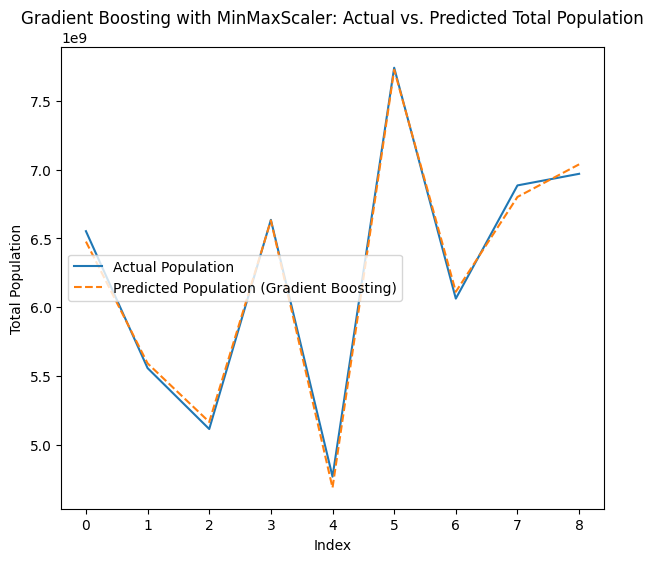

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pickle

# Load the CSV file
df = pd.read_csv('/Users/javi/Desktop/Ironhack/Entregas_de_github/Final-Project-at-Ironhack/Data/Cleaned/World_machine_learning_ready.csv')

# Select relevant features and target
features = df.drop(columns=['World_Total Population'])
target = df['World_Total Population']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

# Model training and evaluation function
def train_and_evaluate(scaler, X_train, X_test, y_train, y_test):
    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42),
        'SVR': SVR(kernel='rbf'),
        'KNN': KNeighborsRegressor()
    }
    
    results = {}
    
    for name, model in models.items():
        if name == 'Random Forest':
            param_grid = {'n_estimators': [50, 100], 'max_features': ['sqrt'], 'max_depth': [10, None]}
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=0)
            grid_search.fit(X_train_scaled, y_train)
            model = grid_search.best_estimator_
        else:
            model.fit(X_train_scaled, y_train)
        
        y_pred = model.predict(X_test_scaled)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'model': model, 'MSE': mse, 'R2': r2, 'y_pred': y_pred}
    
    return results

# Collect and display results for each scaler
all_results = {}
for scaler_name, scaler in scalers.items():
    print(f"\nResults for {scaler_name}:")
    results = train_and_evaluate(scaler, X_train, X_test, y_train, y_test)
    all_results[scaler_name] = results
    for model_name, metrics in results.items():
        print(f"{model_name} - MSE: {metrics['MSE']:.2f}, R2: {metrics['R2']:.4f}")

# Save the best model (assuming Gradient Boosting with MinMaxScaler here for illustration)
best_scaler = MinMaxScaler()
X_train_scaled = best_scaler.fit_transform(X_train)
X_test_scaled = best_scaler.transform(X_test)
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

# Save the best model to a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save predictions to a DataFrame
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

# Plotting the results
plt.figure(figsize=(7, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred, label='Predicted Population (Gradient Boosting)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('Gradient Boosting with MinMaxScaler: Actual vs. Predicted Total Population')
plt.legend()
plt.show()


Mean Squared Error (MSE): 260884349920839.78
R-squared (R2): 0.9997


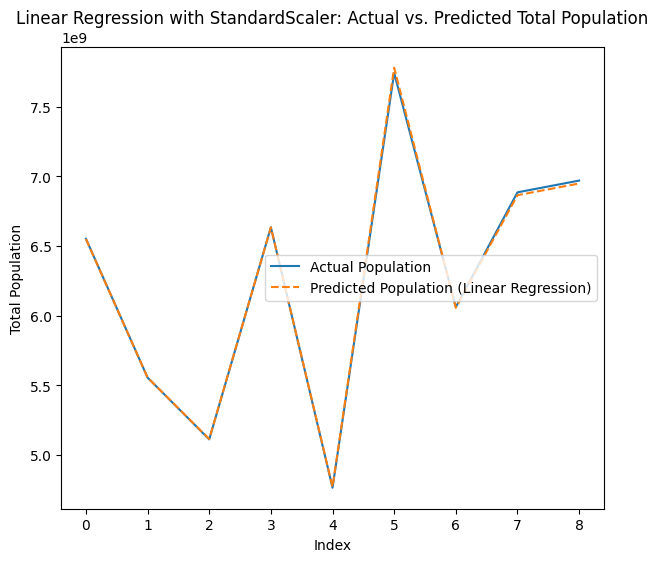

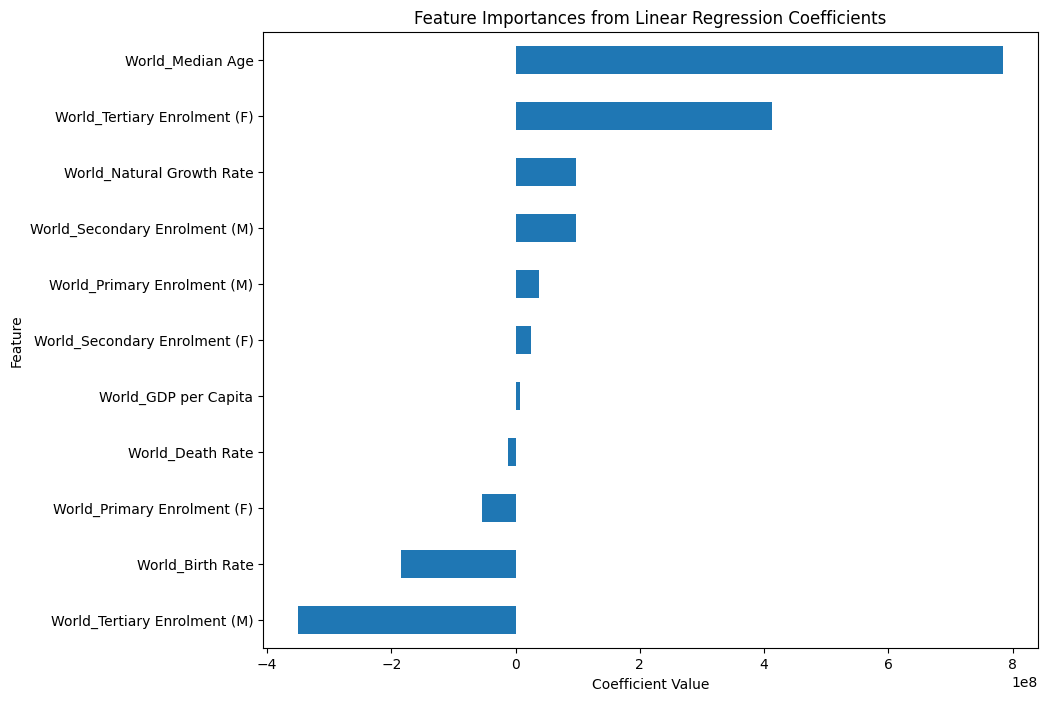

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

# Load the CSV file
df = pd.read_csv('/Users/javi/Desktop/Ironhack/Entregas_de_github/Final-Project-at-Ironhack/Data/Cleaned/World_machine_learning_ready.csv')

# Select relevant features and target
features = df.drop(columns=['World_Total Population'])
target = df['World_Total Population']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.4f}')

# Save the model to a pickle file
with open('linear_regression_standardscaler.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save predictions to a DataFrame
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv('predictions_standardscaler.csv', index=False)

# Plotting the results
plt.figure(figsize=(7, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred, label='Predicted Population (Linear Regression)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('Linear Regression with StandardScaler: Actual vs. Predicted Total Population')
plt.legend()
plt.show()

# Plotting feature importances
coefficients = model.coef_
feature_importances = pd.Series(coefficients, index=features.columns).sort_values()

plt.figure(figsize=(10, 8))
feature_importances.plot(kind='barh')
plt.title('Feature Importances from Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


Mean Squared Error (MSE): 260884349920823.72
R-squared (R2): 0.9997


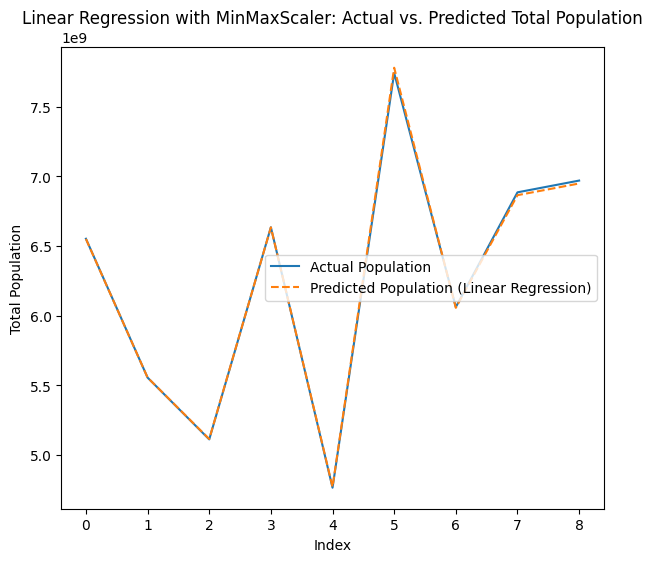

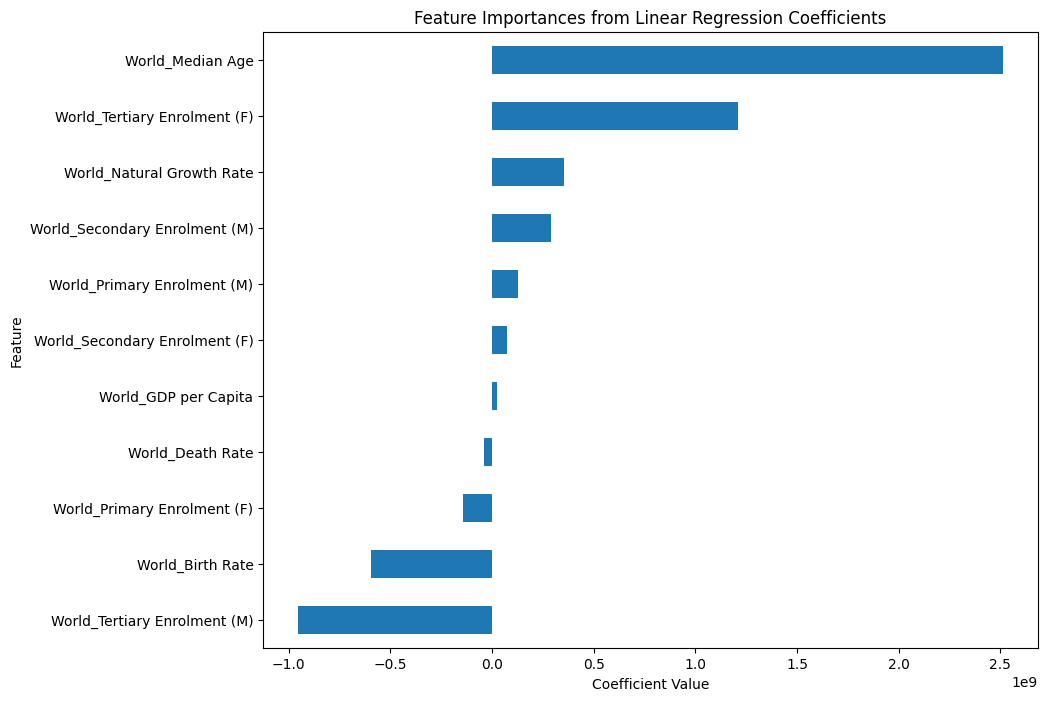

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

# Load the CSV file
df = pd.read_csv('/Users/javi/Desktop/Ironhack/Entregas_de_github/Final-Project-at-Ironhack/Data/Cleaned/World_machine_learning_ready.csv')

# Select relevant features and target
features = df.drop(columns=['World_Total Population'])
target = df['World_Total Population']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.4f}')

# Save the model to a pickle file
with open('linear_regression_minmaxscaler.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save predictions to a DataFrame
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv('predictions_minmaxscaler.csv', index=False)

# Plotting the results
plt.figure(figsize=(7, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Population')
plt.plot(range(len(y_test)), y_pred, label='Predicted Population (Linear Regression)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Population')
plt.title('Linear Regression with MinMaxScaler: Actual vs. Predicted Total Population')
plt.legend()
plt.show()

# Plotting feature importances
coefficients = model.coef_
feature_importances = pd.Series(coefficients, index=features.columns).sort_values()

plt.figure(figsize=(10, 8))
feature_importances.plot(kind='barh')
plt.title('Feature Importances from Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


Mean Squared Error (MSE): 260884349920839.78
R-squared (R2): 0.9997


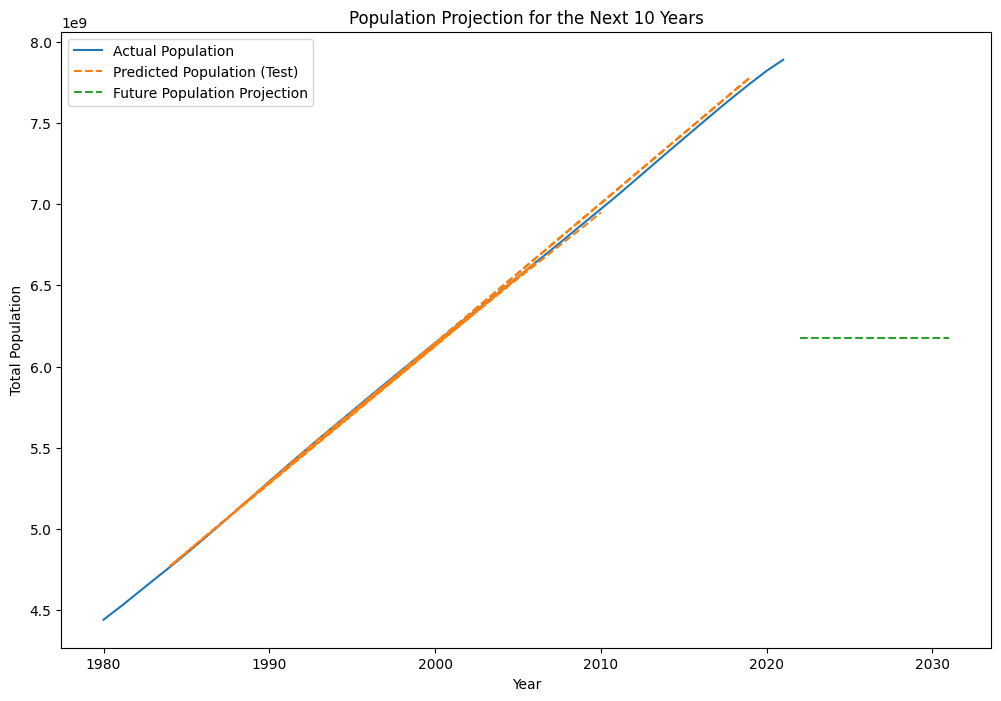

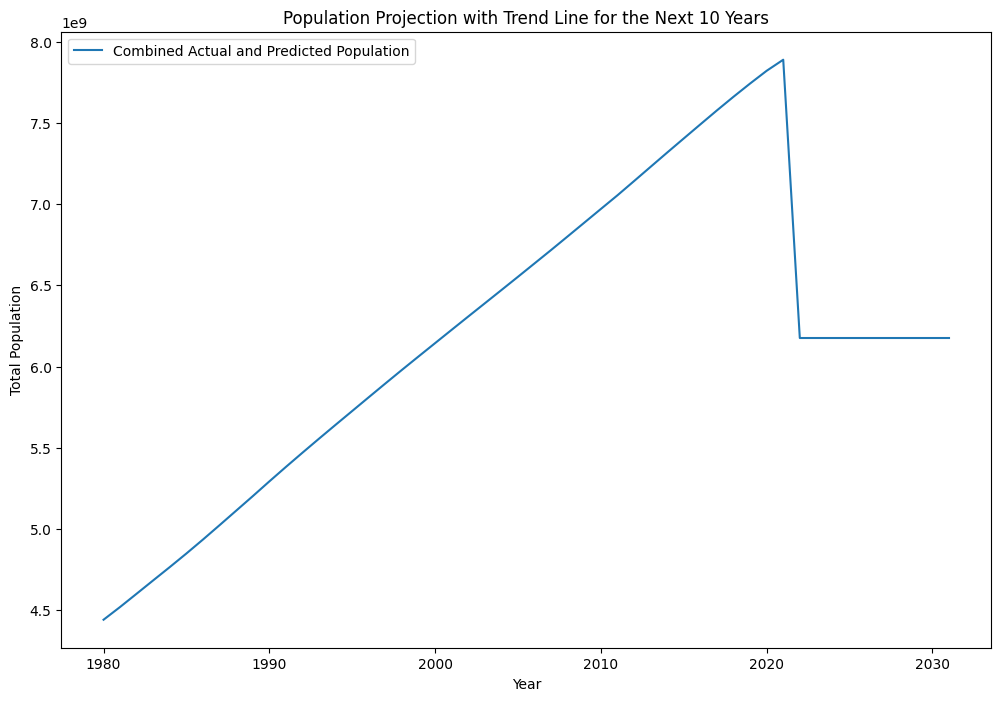

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

# Load the CSV file
file_path = '/Users/javi/Desktop/Ironhack/Entregas_de_github/Final-Project-at-Ironhack/Data/Cleaned/World_machine_learning_ready.csv'
df = pd.read_csv(file_path)

# Generate a hypothetical 'Year' column for illustration
df['Year'] = np.arange(1980, 1980 + len(df))

# Select relevant features and target
features = df.drop(columns=['World_Total Population', 'Year'])
target = df['World_Total Population']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.4f}')

# Save the model to a pickle file
with open('linear_regression_standardscaler.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save predictions to a DataFrame
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv('predictions_standardscaler.csv', index=False)

# Predict the future population for the next 10 years
# Generate future years
future_years = pd.DataFrame({'Year': range(df['Year'].max() + 1, df['Year'].max() + 11)})

# Create future features by extending the trend linearly for simplicity
future_features = pd.DataFrame({
    'World_Tertiary Enrolment (F)': np.full(10, features['World_Tertiary Enrolment (F)'].mean()),
    'World_Tertiary Enrolment (M)': np.full(10, features['World_Tertiary Enrolment (M)'].mean()),
    'World_Secondary Enrolment (M)': np.full(10, features['World_Secondary Enrolment (M)'].mean()),
    'World_Secondary Enrolment (F)': np.full(10, features['World_Secondary Enrolment (F)'].mean()),
    'World_Primary Enrolment (F)': np.full(10, features['World_Primary Enrolment (F)'].mean()),
    'World_Primary Enrolment (M)': np.full(10, features['World_Primary Enrolment (M)'].mean()),
    'World_Birth Rate': np.full(10, features['World_Birth Rate'].mean()),
    'World_Death Rate': np.full(10, features['World_Death Rate'].mean()),
    'World_GDP per Capita': np.full(10, features['World_GDP per Capita'].mean()),
    'World_Natural Growth Rate': np.full(10, features['World_Natural Growth Rate'].mean()),
    'World_Median Age': np.full(10, features['World_Median Age'].mean())
})

# Scale future features
future_features_scaled = scaler.transform(future_features)

# Predict future population
future_population_pred = model.predict(future_features_scaled)

# Combine actual, predicted, and future data for plotting
combined_years = np.concatenate([df['Year'], future_years['Year']])
combined_population = np.concatenate([target, future_population_pred])

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(df['Year'], target, label='Actual Population')
plt.plot(df['Year'][X_test.index], y_pred, label='Predicted Population (Test)', linestyle='--')
plt.plot(future_years['Year'], future_population_pred, label='Future Population Projection', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Projection for the Next 10 Years')
plt.legend()
plt.show()

# Combined plot for a better visualization
plt.figure(figsize=(12, 8))
plt.plot(combined_years, combined_population, label='Combined Actual and Predicted Population', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Projection with Trend Line for the Next 10 Years')
plt.legend()
plt.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   World_Tertiary Enrolment (F)   42 non-null     float64
 1   World_Tertiary Enrolment (M)   42 non-null     float64
 2   World_Secondary Enrolment (M)  42 non-null     float64
 3   World_Secondary Enrolment (F)  42 non-null     float64
 4   World_Primary Enrolment (F)    42 non-null     float64
 5   World_Primary Enrolment (M)    42 non-null     float64
 6   World_Birth Rate               42 non-null     float64
 7   World_Death Rate               42 non-null     float64
 8   World_GDP per Capita           42 non-null     float64
 9   World_Natural Growth Rate      42 non-null     float64
 10  World_Median Age               42 non-null     float64
 11  World_Total Population         42 non-null     float64
dtypes: float64(12)
memory usage: 4.1 KB
